In [1]:
# Data handling libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Data transformation Libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold

# Machine Learning Model Libraries
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Data Evaluation Libraries
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the data into dataframe
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv", index_col=0)

# Data Understanding

In [3]:
# Displaying first 5 rows
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
# Displaying the last 5 rows
df.tail()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0
43824,2014,12,31,23,12.0,-21,-3.0,1034.0,NW,249.85,0,0


# Features in the dataset

1. No: row number
2. year: year of data in this row
3. month: month of data in this row
4. day: day of data in this row
5. hour: hour of data in this row
6. pm2.5: PM2.5 concentration (ug/m^3) (PM2.5 refers to atmospheric Particulate Matter (PM) that is less than 2.5 micrometers in diameter)
7. DEWP: Dew Point (â„ƒ)
8. TEMP: Temperature (â„ƒ)
9. PRES: Pressure (hPa)
10. cbwd: Combined wind direction
11. Iws: Cumulated wind speed (m/s)
12. Is: Cumulated hours of snow
13. Ir: Cumulated hours of rain

In [5]:
# Number of rows and columns
df.shape

(43824, 12)

In [6]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43824 entries, 1 to 43824
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.3+ MB


In [7]:
# Datatypes of variables
df.dtypes

year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

1. Most columns are numerical. 7 columns are integer and 4 columns are float.
2. There is 1 categorical column

In [8]:
# Different columns in the dataset
df.columns

Index(['year', 'month', 'day', 'hour', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd',
       'Iws', 'Is', 'Ir'],
      dtype='object')

# Data Preprocessing

In [9]:
# Check for null values
df.isnull().sum()

year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

#### * pm2.5 has 2067 missing values

In [10]:
#The below code helps to calculate the percentage of missing values
percentage = (df['pm2.5'].isnull().sum()/(len(df['pm2.5'])))*100
print('% of missing values', round(percentage, 2))

% of missing values 4.72


In [11]:
# Imputing null values PM2.5 with mean
df["pm2.5"].fillna(df["pm2.5"].mean(), inplace = True)

In [12]:
# Check for null values again
df.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [13]:
# Check for duplicate values
df.duplicated().sum()

0

#### * There are 0 duplicates values. 

In [14]:
# Joining year, month, day and hour to single datatime column
df['datetime'] = pd.to_datetime(df[['year', 'month','day', 'hour']])

In [15]:
# Distinct values of combined wind direction
df["cbwd"].value_counts()

SE    15290
NW    14150
cv     9387
NE     4997
Name: cbwd, dtype: int64

In [16]:
# Encoding the categorical column cbwd
le = LabelEncoder()
df["cbwd"] = le.fit_transform(df["cbwd"])
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
No,,,,,,,,,,,,,
1,2010,1,1,0,98.613215,-21,-11.0,1021.0,1,1.79,0,0,2010-01-01 00:00:00
2,2010,1,1,1,98.613215,-21,-12.0,1020.0,1,4.92,0,0,2010-01-01 01:00:00
3,2010,1,1,2,98.613215,-21,-11.0,1019.0,1,6.71,0,0,2010-01-01 02:00:00
4,2010,1,1,3,98.613215,-21,-14.0,1019.0,1,9.84,0,0,2010-01-01 03:00:00
5,2010,1,1,4,98.613215,-20,-12.0,1018.0,1,12.97,0,0,2010-01-01 04:00:00


In [17]:
num_cols = df[[ 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'Iws', 'Is', 'Ir', 'cbwd']]

### Univariate Analysis

pm2.5
Skew : 1.85
Kurtosis 5.153475608424025
IQR 101.0


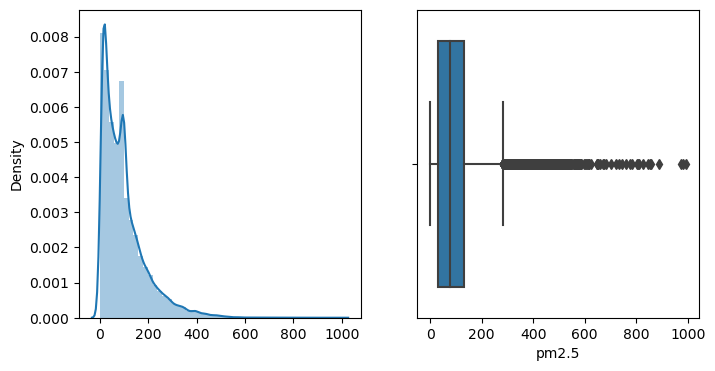

DEWP
Skew : -0.15
Kurtosis -1.1952890067777526
IQR 25.0


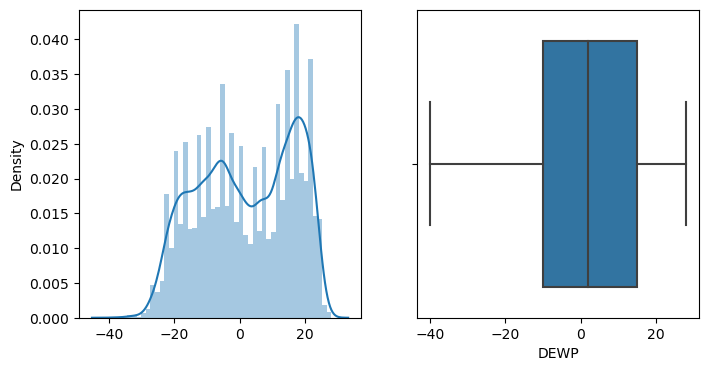

TEMP
Skew : -0.16
Kurtosis -1.110976735927123
IQR 21.0


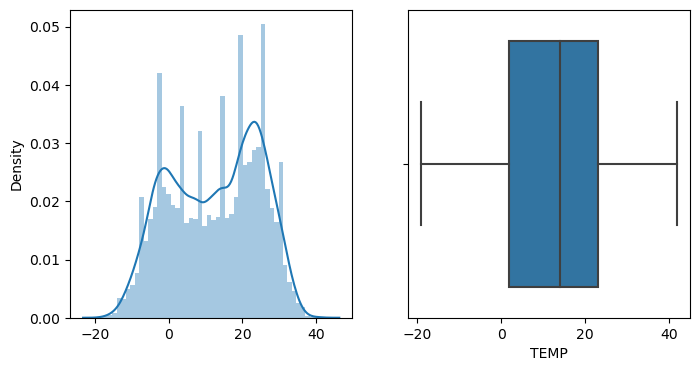

PRES
Skew : 0.1
Kurtosis -0.8464621417423372
IQR 17.0


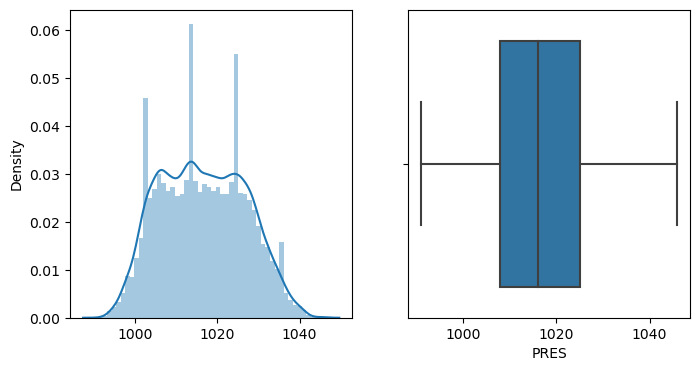

Iws
Skew : 4.3
Kurtosis 23.42130922116742
IQR 20.12


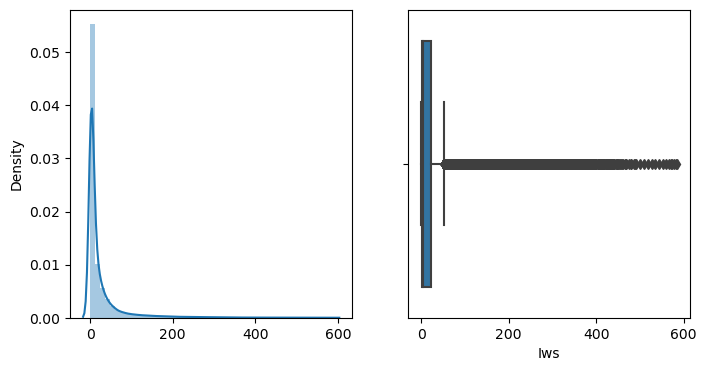

Is
Skew : 19.48
Kurtosis 449.08244936649004
IQR 0.0


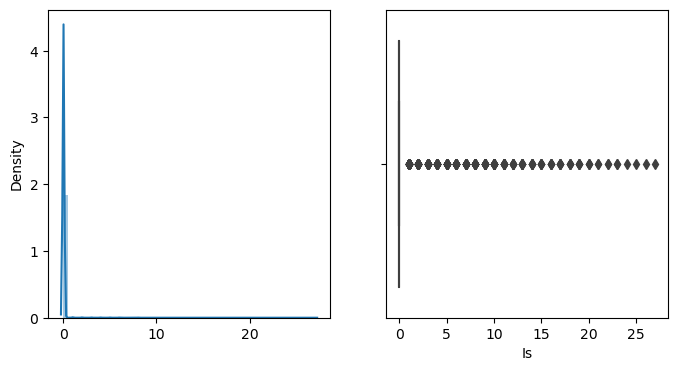

Ir
Skew : 11.66
Kurtosis 174.42484912078987
IQR 0.0


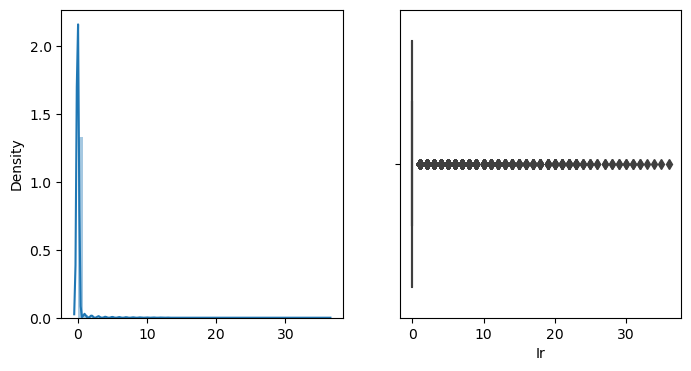

cbwd
Skew : -0.11
Kurtosis -0.9024475901968514
IQR 1.0


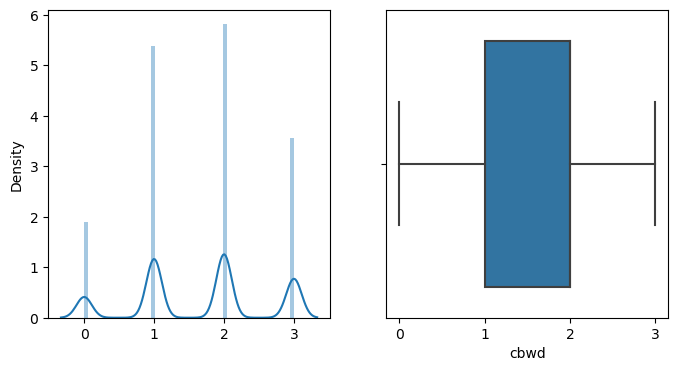

In [18]:
# Check for data distribution and outliers
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    print('Kurtosis', df[col].kurt())
    print('IQR', df[col].quantile(0.75) - df[col].quantile(0.25))
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.distplot(x=df[col], kde='True')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    
    plt.show()

# Exploratory Data Analysis

In [19]:
#Check for unique values
df.nunique()

year            5
month          12
day            31
hour           24
pm2.5         582
DEWP           69
TEMP           64
PRES           60
cbwd            4
Iws          2788
Is             28
Ir             37
datetime    43824
dtype: int64

In [20]:
# Descrivtive statistics for numerical values
df.describe()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,1.663267,23.889140,0.052734,0.194916
std,1.413842,3.448572,8.799425,6.922266,89.853296,14.433440,12.198613,10.268698,0.937981,50.010635,0.760375,1.415867
min,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.000000,0.450000,0.000000,0.000000
25%,2011.000000,4.000000,8.000000,5.750000,31.000000,-10.000000,2.000000,1008.000000,1.000000,1.790000,0.000000,0.000000
50%,2012.000000,7.000000,16.000000,11.500000,77.000000,2.000000,14.000000,1016.000000,2.000000,5.370000,0.000000,0.000000
75%,2013.000000,10.000000,23.000000,17.250000,132.000000,15.000000,23.000000,1025.000000,2.000000,21.910000,0.000000,0.000000
max,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,3.000000,585.600000,27.000000,36.000000


### Statistical Insights
1. Data is of 5 years, from year 2010 -2014
2. pm2.5 is from min 0 to max 994. From 75% to max there is extreme values. It has outliers.
3. Dew point ranges from -40 to 28
4. Temperature ranges from -19 to 42
5. Pressure ranges from 991 to 1046
6. Wind direction has 4 values: SE, NW, cv, NE
7. Iws is from min 0 to max 585. From 75% to max there is extreme values. It has outliers.
8. Is is almost zero except for max of 27
9. Ir is almost zero except for max of 36

### Multivariate correlation

<Axes: >

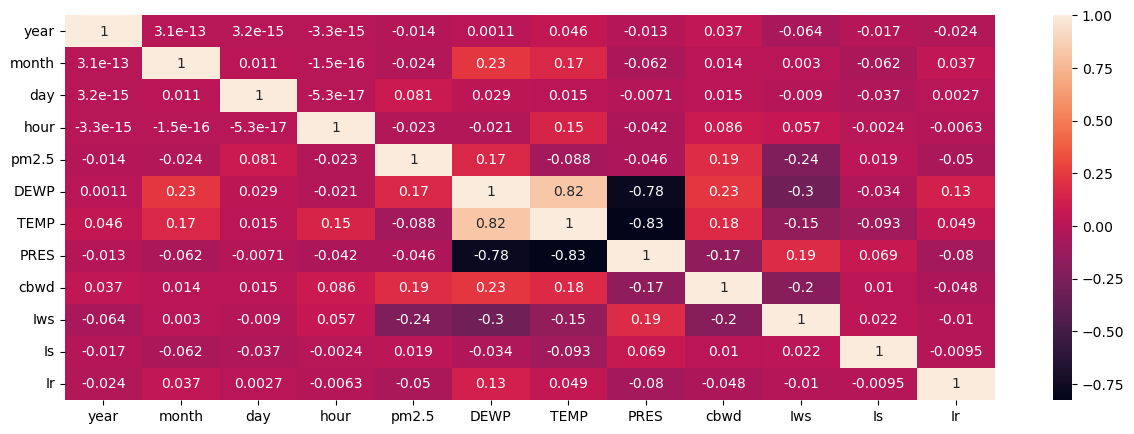

In [21]:
# check correlation between variables
corr = df.corr()
f, ax = plt.subplots(figsize=(15,5))
sns.heatmap(corr, annot=True)

### Bivariate Analysis

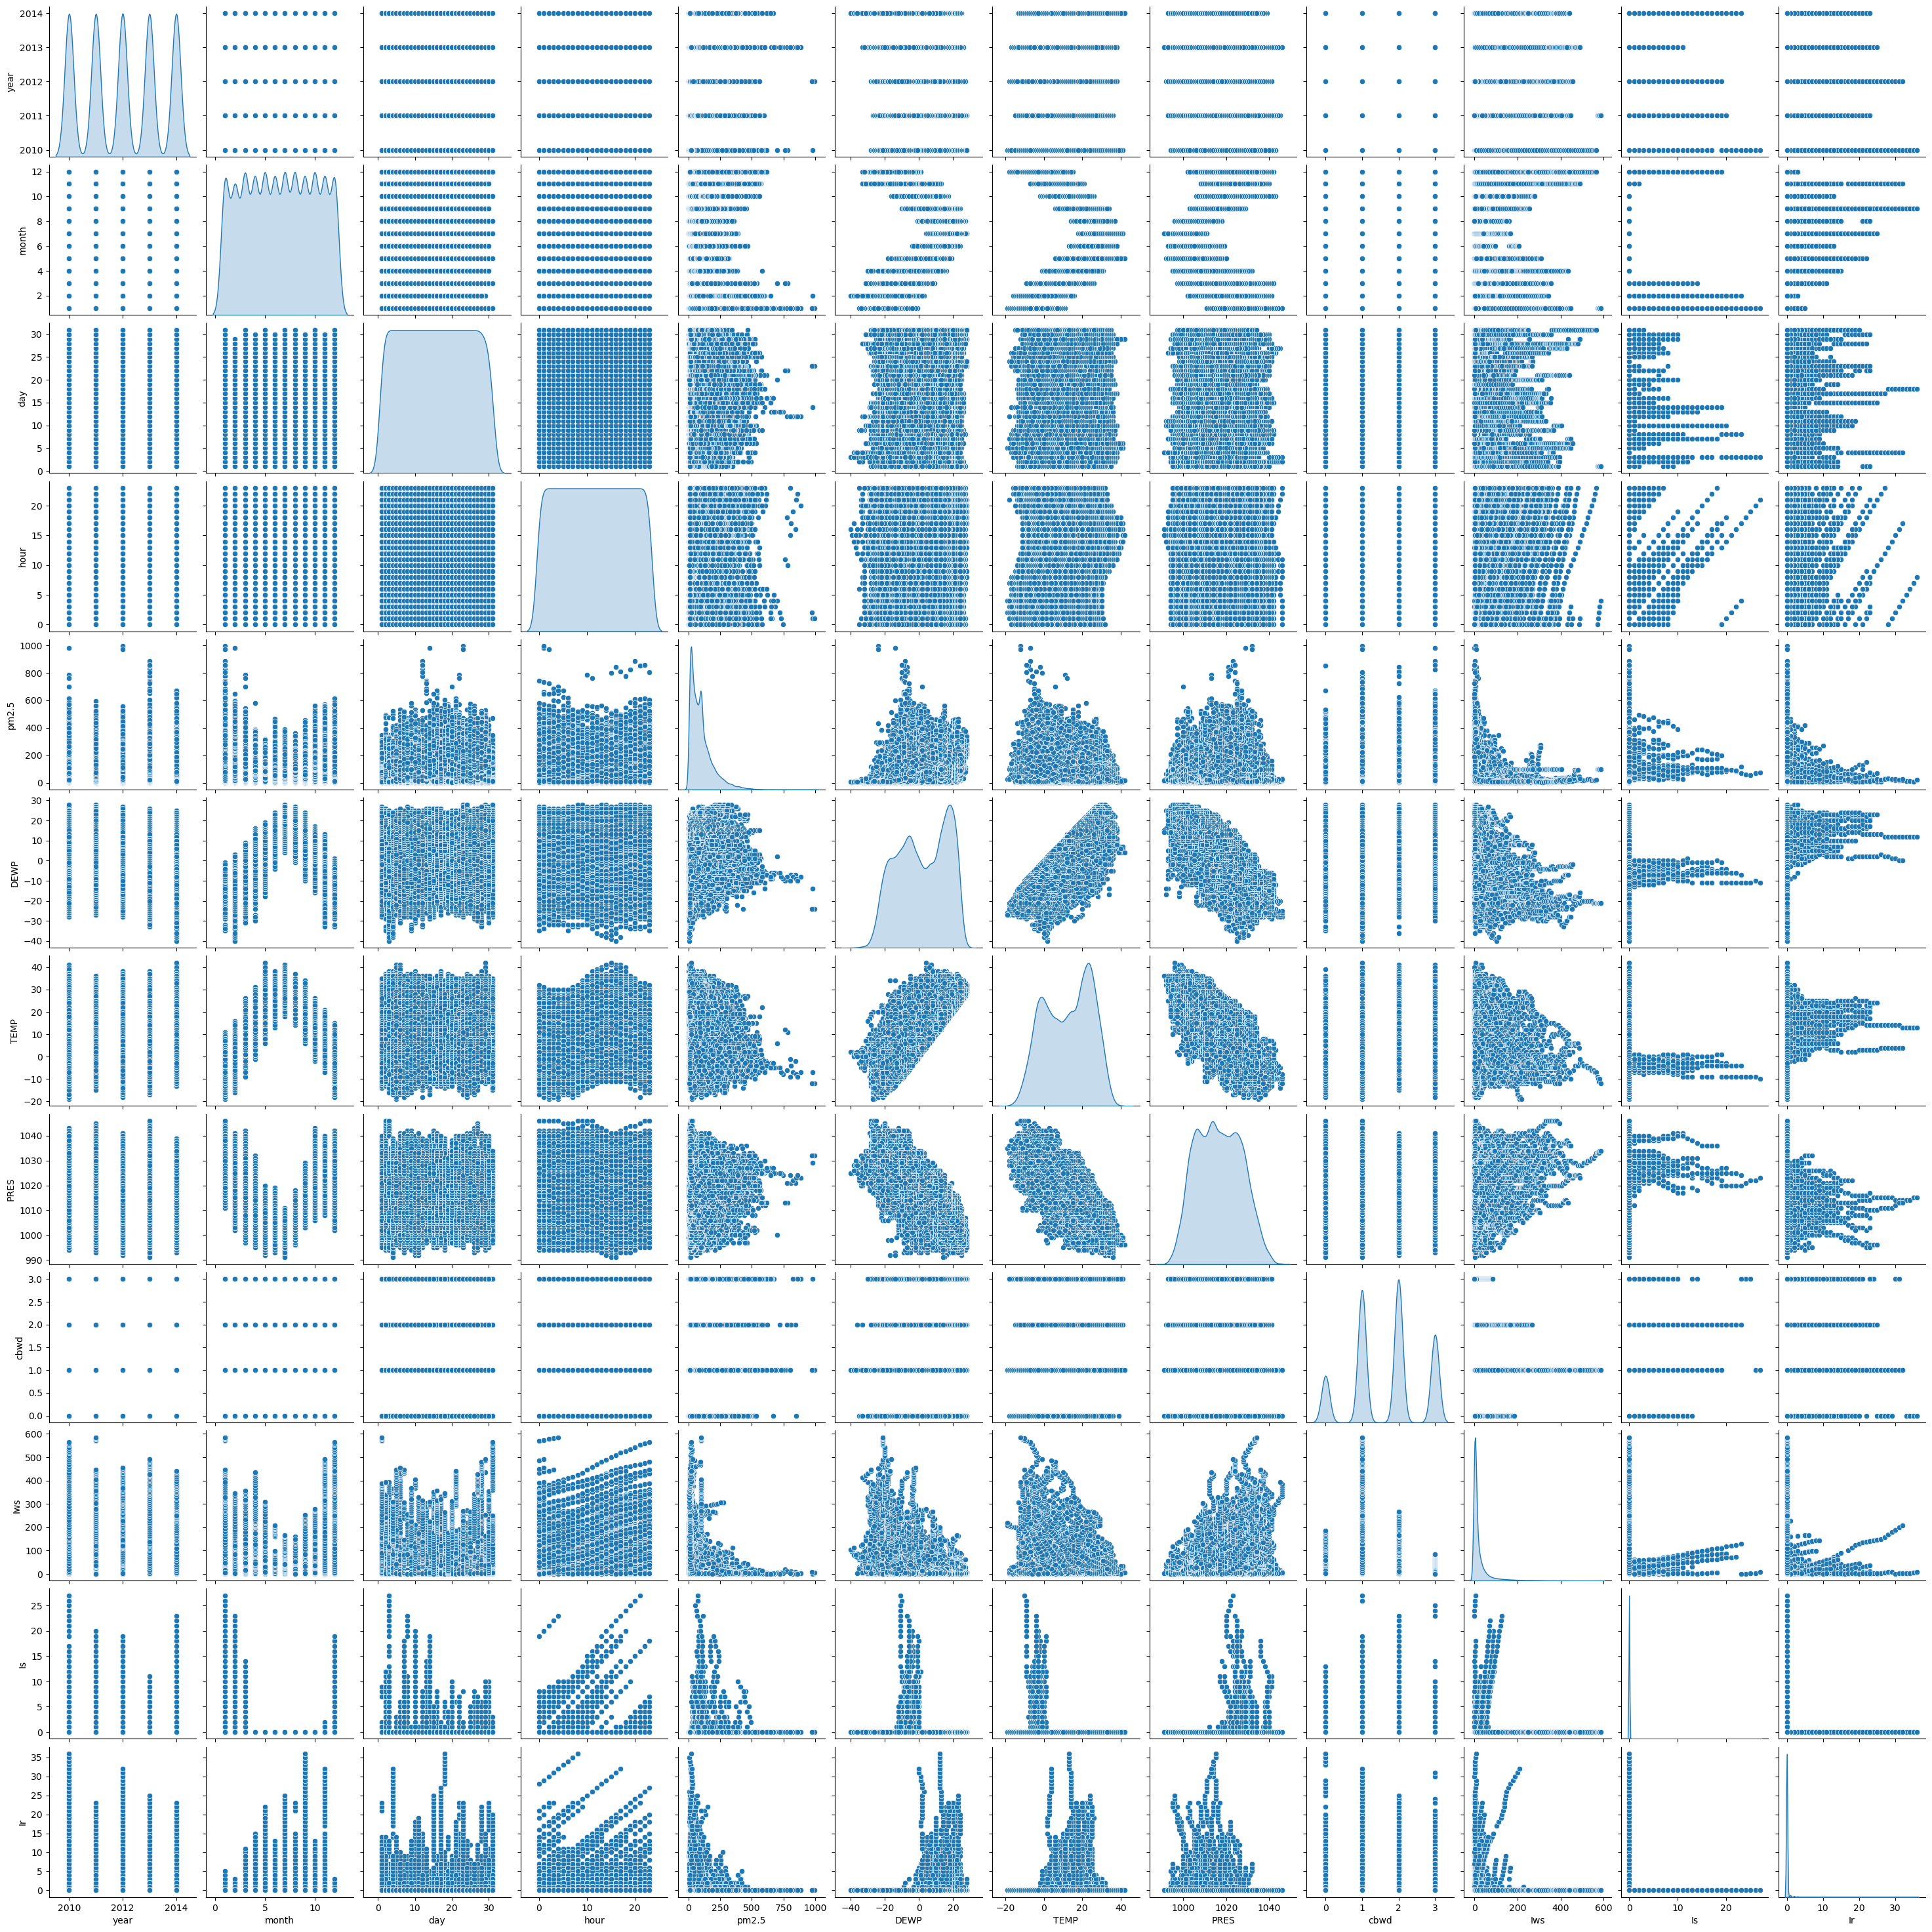

In [22]:
# Relation between two variables
sns.pairplot(data=df, diag_kind='kde')

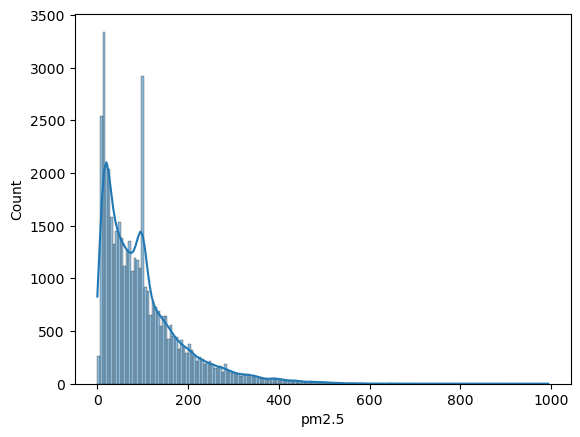

In [23]:
# using histplot to check the distribution of target column
sns.histplot(data = df, x="pm2.5", kde=True)
plt.show()

<Axes: xlabel='year', ylabel='pm2.5'>

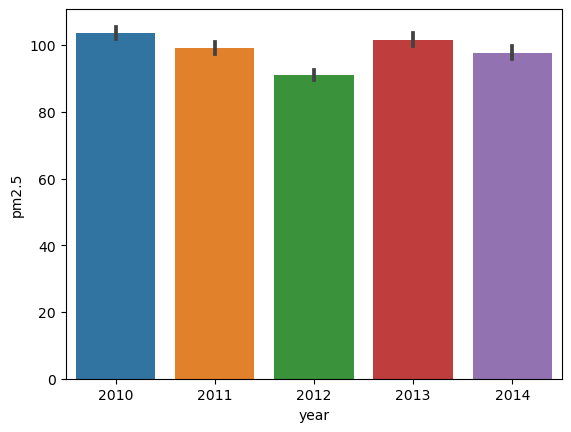

In [24]:
# distrbution of target variable every year
sns.barplot(data = df, x = "year", y="pm2.5")

<Axes: xlabel='datetime', ylabel='pm2.5'>

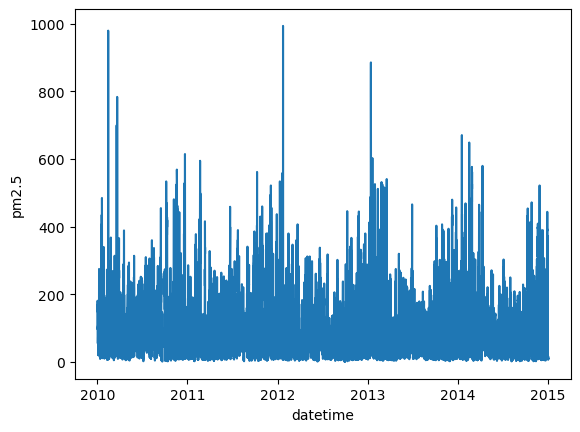

In [25]:
# distribution of target variable for datetime
sns.lineplot(data = df, x = "datetime", y="pm2.5")

<Axes: xlabel='DEWP', ylabel='pm2.5'>

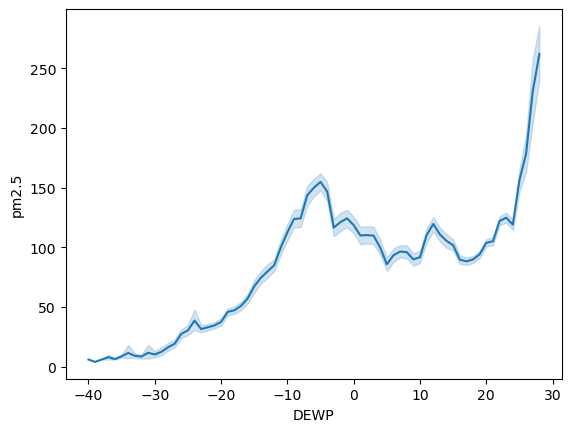

In [26]:
# Relationship between Dew point and pm2.5
sns.lineplot(data = df, x = "DEWP", y="pm2.5")

<Axes: xlabel='DEWP', ylabel='TEMP'>

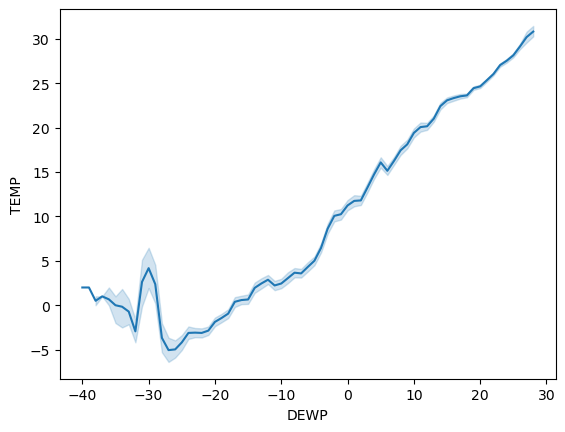

In [27]:
# Relationship between temperature and dew point
sns.lineplot(data = df, x = "DEWP", y="TEMP")

<Axes: xlabel='DEWP', ylabel='PRES'>

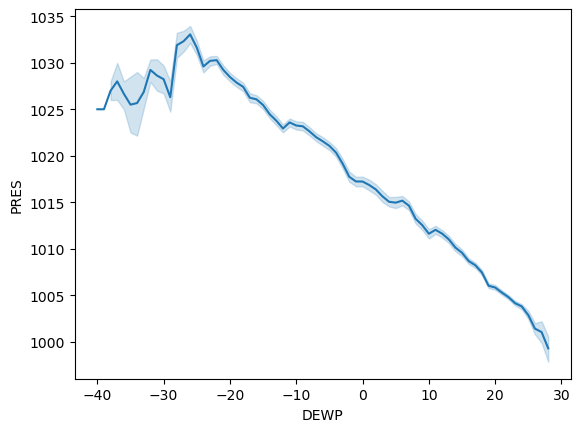

In [28]:
# Relationship between pressure and dew point
sns.lineplot(data = df, x = "DEWP", y="PRES")

# Model Building

In [29]:
# splitting the data into training and testing set

X = df.drop(columns = ["pm2.5", "datetime"], axis=1)
y = df["pm2.5"]

# Apply feature scaling
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Ridge Regression

In [30]:
rr = Ridge()

In [31]:
## Finding the best value of alpha with the help of gridsearchcv
parameters = {'alpha':[1,2,3,4,5,6,7,8,9]}
rr_cv = GridSearchCV(rr, parameters, cv=10)
rr_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [32]:
#best value of alpha
rr_cv.best_params_

{'alpha': 3}

In [33]:
# Building the model
rr = Ridge(alpha=3)
rr.fit(X_train,y_train)
rr_y_train_pred = rr.predict(X_train)
rr_y_test_pred = rr.predict(X_test)

## Random Forest Regression

In [34]:
rf = RandomForestRegressor()

In [35]:
# Selecting the parameter grids
param_grid = { "n_estimators" : [100,200,300,400,500],
              "max_features" : ['auto','sqrt','log2'],
               "max_depth" : [2,3,5,7],
               "min_samples_split" : [2,3,4,5,6,7,8,9,10],
               "min_samples_leaf" : [2,3,4,5,6,7,8,9,10]
               }

rf_grid = RandomizedSearchCV(estimator = rf,
                       param_distributions = param_grid,
                       cv = 10,
                       verbose=2,
                       n_jobs = -1)

In [36]:
rf_grid.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [2, 3, 5, 7],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5, 6, 7,
                                                             8, 9, 10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   verbose=2)

In [37]:
rf_grid.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 6,
 'max_features': 'log2',
 'max_depth': 7}

In [38]:
# Rebuilding with best parameters
rf = RandomForestRegressor(n_estimators = 500,
                           max_depth = 7,
                           min_samples_split = 5,
                           min_samples_leaf = 6,
                           max_features = 'log2'
                           )

rf.fit(X_train,y_train)
rf_y_train_pred = rf.predict(X_train)
rf_y_test_pred = rf.predict(X_test)

# Model Evaluation

## Ridge Regression

In [39]:
# Performance evaluation of training and testing data for Ridge Regression

print("Ridge Regression Model Performance: \n")
print("------------------Training Performance:----------------")

print("Mean absolute error      :", mean_absolute_error(y_train, rr_y_train_pred))
print("Mean squared error       :", mean_squared_error(y_train, rr_y_train_pred))
print("Root mean squared error  :", np.sqrt(mean_squared_error(y_train, rr_y_train_pred)))
print("R2 Score                 :", r2_score(y_train, rr_y_train_pred))


print("------------------Testing Performance:----------------")

print("Mean absolute error      :", mean_absolute_error(y_test, rr_y_test_pred))
print("Mean squared error       :", mean_squared_error(y_test, rr_y_test_pred))
print("Root mean squared error  :", np.sqrt(mean_squared_error(y_test, rr_y_test_pred)))
print("R2 Score                 :", r2_score(y_test, rr_y_test_pred))

Ridge Regression Model Performance: 

------------------Training Performance:----------------
Mean absolute error      : 55.97072280276848
Mean squared error       : 6014.458441091686
Root mean squared error  : 77.55293960316196
R2 Score                 : 0.2581366040410419
------------------Testing Performance:----------------
Mean absolute error      : 55.88726387617095
Mean squared error       : 5907.460196331661
Root mean squared error  : 76.86000387933676
R2 Score                 : 0.25581757414532347


## Random Forest

In [40]:
# Performance evaluation of training and testing data for Random Forest Regression

print("Random Forest Regression Model Performance: \n")
print("------------------Training Performance:----------------")

print("Mean absolute error      :", mean_absolute_error(y_train, rf_y_train_pred))
print("Mean squared error       :", mean_squared_error(y_train, rf_y_train_pred))
print("Root mean squared error  :", np.sqrt(mean_squared_error(y_train, rf_y_train_pred)))
print("R2 Score                 :", r2_score(y_train, rf_y_train_pred))

print("------------------Testing Performance:----------------")

print("Mean absolute error      :", mean_absolute_error(y_test, rf_y_test_pred))
print("Mean squared error       :", mean_squared_error(y_test, rf_y_test_pred))
print("Root mean squared error  :", np.sqrt(mean_squared_error(y_test, rf_y_test_pred)))
print("R2 Score                 :", r2_score(y_test, rf_y_test_pred))

Random Forest Regression Model Performance: 

------------------Training Performance:----------------
Mean absolute error      : 48.72924631986362
Mean squared error       : 4627.075743930498
Root mean squared error  : 68.02261200461578
R2 Score                 : 0.4292656340761848
------------------Testing Performance:----------------
Mean absolute error      : 49.142998241866124
Mean squared error       : 4656.147491001075
Root mean squared error  : 68.23596918781966
R2 Score                 : 0.4134496010414068


## Cross Validation and Overfitting Check

In [41]:
# Checking if Ridge Model is overfitted or not

train_score = rr.score(X_train, y_train)
test_score = rr.score(X_test, y_test)

if train_score > test_score:
    print("Ridge Regression Model is Overfitted")
    print("Train Score: ",train_score)
    print("Test Score: ",test_score)
else:
    print("Ridge Regression is not Overfitted")
    print("Train Score: ",train_score)
    print("Test Score: ",test_score)

Ridge Regression Model is Overfitted
Train Score:  0.2581366040410419
Test Score:  0.25581757414532347


In [42]:
# Since the Ridge Regression Model is overfitted, we will do k-fold cross validation test.
k_fold = KFold(n_splits = 10, shuffle = True, random_state = 42)

rr_score = cross_val_score(rr, X_test, y_test, cv=k_fold)
print(rr_score)
np.mean(rr_score)

[0.21546204 0.27111626 0.26652894 0.25000027 0.2547774  0.2538886
 0.27483873 0.23561666 0.25774891 0.25967737]


0.25396551794025546

In [43]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

test_score = []
train_score = []

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Performing Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    rr.fit(X_train,y_train)

    y_pred_test = rr.predict(X_test)
    y_pred_train = rr.predict(X_train)

    mae_test = mean_absolute_error(y_pred_test, y_test)
    mae_train = mean_absolute_error(y_pred_train, y_train)

    test_score.append(mae_test)
    train_score.append(mae_train)

# Calculating and printing MAE score of each training fold
print("MAE Score for each Fold in Training \n")

for fold, score in enumerate(train_score):
    print(f"Fold {fold+1} : {score}")

# Calculating and printing MAE score of each testing fold
print("\n MAE Score for each Fold in Testing \n")

for fold, score in enumerate(test_score):
    print(f"Fold {fold+1} : {score}")


# Average MAE Score of Training Set
avg_MAE_train = sum(train_score) / len(train_score)
print("\n Average MAE Train Score: ", avg_MAE_train)

# Average MAE Score of Testing Set
avg_MAE_test = sum(test_score) / len(test_score)
print("\n Average MAE Test Score: ", avg_MAE_test)

MAE Score for each Fold in Training 

Fold 1 : 55.917401705958
Fold 2 : 56.012593615443606
Fold 3 : 55.71950938536501
Fold 4 : 55.93879377317104
Fold 5 : 56.035941639248726
Fold 6 : 56.03046362843927
Fold 7 : 56.0060470380849
Fold 8 : 55.91019579981271
Fold 9 : 56.24716109198454
Fold 10 : 55.768768587915005

 MAE Score for each Fold in Testing 

Fold 1 : 56.13366866521718
Fold 2 : 55.64546646176488
Fold 3 : 57.76000360538287
Fold 4 : 55.95098539627708
Fold 5 : 55.494525256623234
Fold 6 : 55.63333344724368
Fold 7 : 55.13253026866069
Fold 8 : 56.43739797382046
Fold 9 : 54.25012149887789
Fold 10 : 57.33667566275066

 Average MAE Train Score:  55.95868762654228

 Average MAE Test Score:  55.97747082366186


In [44]:
# Checking if Random Forest Model is overfitted or not

train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

if train_score > test_score:
    print("Random Forest Model is Overfitted")
    print("Train Score: ",train_score)
    print("Test Score: ",test_score)
else:
    print("Random Forest is not Overfitted")
    print("Train Score: ",train_score)
    print("Test Score: ",test_score)

Random Forest is not Overfitted
Train Score:  0.42599707373472895
Test Score:  0.4274365562477759


In [45]:
rf_score = cross_val_score(rf, X_test, y_test, cv=k_fold)
rf_score

array([0.41988378, 0.39399026, 0.34787196, 0.32928554, 0.36614425,
       0.39690887, 0.36508534, 0.41188608, 0.39635591, 0.43338441])

In [46]:
kf = KFold(n_splits = 10, shuffle = True, random_state = 42)

test_score = []
train_score = []

X = pd.DataFrame(X)
y = pd.DataFrame(y)

# Performing Cross Validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


    rf.fit(X_train, y_train)

    y_pred_test = rf.predict(X_test)
    y_pred_train = rf.predict(X_train)

    mae_test = mean_absolute_error(y_pred_test, y_test)
    mae_train = mean_absolute_error(y_pred_train, y_train)

    test_score.append(mae_test)
    train_score.append(mae_train)

# Calculating and printing MAE score of each training fold
print("MAE Score for each Fold in Training \n")

for fold, score in enumerate(train_score):
    print(f"Fold {fold+1} : {score}")

# Calculating and printing MAE score of each testing fold
print("\n MAE Score for each Fold in Testing \n")

for fold, score in enumerate(test_score):
    print(f"Fold {fold+1} : {score}")


# Average MAE Score of Training Set
avg_MAE_train = sum(train_score) / len(train_score)
print("\n Average MAE Train Score: ", avg_MAE_train)

# Average MAE Score of Testing Set
avg_MAE_test = sum(test_score) / len(test_score)
print("\n Average MAE Test Score: ", avg_MAE_test)

MAE Score for each Fold in Training 

Fold 1 : 48.62748380319216
Fold 2 : 48.69052340849805
Fold 3 : 48.55733030180133
Fold 4 : 48.58684720086641
Fold 5 : 48.717928161247286
Fold 6 : 48.678558070990114
Fold 7 : 48.67501843468022
Fold 8 : 48.773016283413206
Fold 9 : 48.95217863001018
Fold 10 : 48.41901508966516

 MAE Score for each Fold in Testing 

Fold 1 : 49.018920556956424
Fold 2 : 49.04382748117248
Fold 3 : 50.03054275660487
Fold 4 : 49.308417977555585
Fold 5 : 48.997535561641335
Fold 6 : 48.579044436393296
Fold 7 : 49.22902011002759
Fold 8 : 49.56443120157784
Fold 9 : 48.25102119692097
Fold 10 : 50.344788588196366

 Average MAE Train Score:  48.66778993843641

 Average MAE Test Score:  49.23675498670468
